In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the path to the data file
data_path = Path("../data/processed/asomata_cleaned.xlsx")

# Load the data
df = pd.read_excel(data_path)

# Display the first few rows to verify the data loaded correctly
print(f"Loaded data with {df.shape[0]} rows and {df.shape[1]} columns")
df.head()

Loaded data with 3621 rows and 42 columns


,Date,Production Unit I (MWh),Production Unit II (MWh),Total HPP,Auxiliaries Consumptions Unit I (MWh),Auxiliaries Consumptions Unit II (MWh),Auxiliaries Consumptions Grid (MWh),Net Production (MWh),Peak (MW),Hours of Operation Unit I,...,HPP Sfikia Water Production (m3 x 1000),HPP Sfikia Water Pumped upstream (m3 x 1000),Lake natural inflow (m3 x 1000),Losses (m3 x 1000),B,Regulating lake Water flow (m3/s),Regulating lake Total Water (m3 x 1000),Year,Month,SourceFile
0,1,590,160,750,0.0,0.0,5,745,105,13.2,...,9840.4,2872.340426,243.940426,60,NaN,89.722222,7752.00,2014,1,2014_01_Asomata_english.xlsx
1,2,600,0,600,0.0,0.0,5,595,55,12.9,...,7784.0,1840.425532,56.425532,60,NaN,70.138889,6060.00,2014,1,2014_01_Asomata_english.xlsx
2,3,235,0,235,0.0,0.0,4,231,54,5.5,...,2628.0,0.000000,156.500000,30,NaN,29.103009,2514.50,2014,1,2014_01_Asomata_english.xlsx
3,4,355,0,355,0.0,0.0,5,350,54,7.0,...,3268.8,2356.382979,256.392979,60,NaN,42.000116,3628.81,2014,1,2014_01_Asomata_english.xlsx
4,5,195,0,195,0.0,0.0,5,190,40,5.0,...,2275.2,0.000000,81.300000,150,NaN,24.149306,2086.50,2014,1,2014_01_Asomata_english.xlsx


In [3]:
# Drop SourceFile, Date.1, and B columns
df = df.drop(columns=['SourceFile', 'Date.1', 'B', 'Comments'], errors='ignore')

# Get all column names
all_cols = df.columns.tolist()

# Remove Year and Month if they exist (so we don't duplicate them)
cols_without_year_month = [col for col in all_cols if col not in ['Year', 'Month']]

# Create new column order with Year and Month first, then all other columns
new_col_order = ['Year', 'Month'] + cols_without_year_month

# Reindex the dataframe with the new column order
df = df[new_col_order]

# Display the result
print("DataFrame with reorganized columns:")
df.head()

DataFrame with reorganized columns:


,Year,Month,Date,Production Unit I (MWh),Production Unit II (MWh),Total HPP,Auxiliaries Consumptions Unit I (MWh),Auxiliaries Consumptions Unit II (MWh),Auxiliaries Consumptions Grid (MWh),Net Production (MWh),...,Catchment water inflow,Production Water Consumption (m3 x 1000),Specific Consumption,Turbine Efficiency,HPP Sfikia Water Production (m3 x 1000),HPP Sfikia Water Pumped upstream (m3 x 1000),Lake natural inflow (m3 x 1000),Losses (m3 x 1000),Regulating lake Water flow (m3/s),Regulating lake Total Water (m3 x 1000)
0,2014,1,1,590,160,750,0.0,0.0,5,745,...,10024.340426,7752.00,10.336,83.440807,9840.4,2872.340426,243.940426,60,89.722222,7752.00
1,2014,1,2,600,0,600,0.0,0.0,5,595,...,7780.425532,6060.00,10.100,85.490973,7784.0,1840.425532,56.425532,60,70.138889,6060.00
2,2014,1,3,235,0,235,0.0,0.0,4,231,...,2754.500000,2514.50,10.700,80.507657,2628.0,0.000000,156.500000,30,29.103009,2514.50
3,2014,1,4,355,0,355,0.0,0.0,5,350,...,3465.192979,3628.81,10.222,86.401972,3268.8,2356.382979,256.392979,60,42.000116,3628.81
4,2014,1,5,195,0,195,0.0,0.0,5,190,...,2206.500000,2086.50,10.700,82.442937,2275.2,0.000000,81.300000,150,24.149306,2086.50


In [4]:
df.columns

Index(['Year', 'Month', 'Date', 'Production Unit I (MWh)',
       'Production Unit II (MWh)', 'Total HPP',
       'Auxiliaries Consumptions Unit I (MWh)',
       'Auxiliaries Consumptions Unit II (MWh)',
       'Auxiliaries Consumptions Grid (MWh)', 'Net Production (MWh)',
       'Peak (MW)', 'Hours of Operation Unit I', 'Hours of Operation Unit II',
       'Unit I Maintenance Plant', 'Unit I Maintenance Outside',
       'Unit I Failure Plant', 'Unit I Failure Outside',
       'Unit II Maintenance Plant', 'Unit II Maintenance Outside',
       'Unit II Failure Plant', 'Unit II Failure Outside',
       'Number of Starts Unit I', 'Number of Starts Unit II',
       'Asomata Reservoir Water Level (m)',
       'Asomata Reservoir Water Content (m3 x 1000)',
       'Regulating lake Water Level (m)',
       'Regulating lake Water Content (m3 x 1000)', 'Water saved in lake',
       'Catchment water inflow', 'Production Water Consumption (m3 x 1000)',
       'Specific Consumption', 'Turbine Effic

In [5]:
# Create a proper datetime column from Year, Month, and the existing Date column (which has day numbers)
# First, check what's in the Date column
print("First few values in the Date column (contains day numbers):")
print(df['Date'].head())

# Create a proper datetime from Year, Month, and the day numbers in the Date column
# Rename the old Date column temporarily to avoid confusion
df = df.rename(columns={'Date': 'Day'})

# Now create the proper datetime
df['Date'] = pd.to_datetime({
    'year': df['Year'], 
    'month': df['Month'], 
    'day': df['Day']
})

# Get the min and max dates in the dataset
min_date = df['Date'].min()
max_date = df['Date'].max()

# Create a complete date range at monthly frequency
complete_date_range = pd.date_range(start=min_date, end=max_date, freq='MS')  # MS = Month Start

# Convert to DataFrame for comparison
date_df = pd.DataFrame({'Date': complete_date_range})

# Check which dates from the complete range are missing in the dataset
missing_dates = date_df[~date_df['Date'].isin(df['Date'])]

if missing_dates.empty:
    print("No missing months in the dataset.")
else:
    print(f"Found {len(missing_dates)} missing months in the dataset:")
    print(missing_dates.sort_values('Date'))

# Count records per month to check for potentially incomplete months
print("\nRecords per month:")
monthly_counts = df.groupby(['Year', 'Month']).size().reset_index(name='count')
print(monthly_counts.sort_values(['Year', 'Month']))

First few values in the Date column (contains day numbers):
0    1
1    2
2    3
3    4
4    5
Name: Date, dtype: int64
Found 1 missing months in the dataset:
          Date
112 2023-05-01

Records per month:
     Year  Month  count
0    2014      1     31
1    2014      2     28
2    2014      3     31
3    2014      4     30
4    2014      5     31
..    ...    ...    ...
114  2023      8     31
115  2023      9     30
116  2023     10     31
117  2023     11     30
118  2023     12     31

[119 rows x 3 columns]


In [6]:
df

,Year,Month,Day,Production Unit I (MWh),Production Unit II (MWh),Total HPP,Auxiliaries Consumptions Unit I (MWh),Auxiliaries Consumptions Unit II (MWh),Auxiliaries Consumptions Grid (MWh),Net Production (MWh),...,Production Water Consumption (m3 x 1000),Specific Consumption,Turbine Efficiency,HPP Sfikia Water Production (m3 x 1000),HPP Sfikia Water Pumped upstream (m3 x 1000),Lake natural inflow (m3 x 1000),Losses (m3 x 1000),Regulating lake Water flow (m3/s),Regulating lake Total Water (m3 x 1000),Date
0,2014,1,1,590,160,750,0.0,0.0,5,745,...,7752.00,10.336,83.440807,9840.40,2872.340426,243.940426,60,89.722222,7752.00,2014-01-01
1,2014,1,2,600,0,600,0.0,0.0,5,595,...,6060.00,10.100,85.490973,7784.00,1840.425532,56.425532,60,70.138889,6060.00,2014-01-02
2,2014,1,3,235,0,235,0.0,0.0,4,231,...,2514.50,10.700,80.507657,2628.00,0.000000,156.500000,30,29.103009,2514.50,2014-01-03
3,2014,1,4,355,0,355,0.0,0.0,5,350,...,3628.81,10.222,86.401972,3268.80,2356.382979,256.392979,60,42.000116,3628.81,2014-01-04
4,2014,1,5,195,0,195,0.0,0.0,5,190,...,2086.50,10.700,82.442937,2275.20,0.000000,81.300000,150,24.149306,2086.50,2014-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3616,2023,12,27,244,0,244,0.0,0.0,3,244,...,2440.00,10.000,85.740654,5141.55,2696.808511,115.258511,0,28.240741,2440.00,2023-12-27
3617,2023,12,28,187,267,454,0.0,0.0,4,454,...,4585.40,10.100,84.693854,8150.30,3372.340426,87.440426,40,53.071759,4585.40,2023-12-28
3618,2023,12,29,257,0,257,0.0,0.0,3,257,...,2595.70,10.100,83.814679,9118.80,5489.361702,106.261702,60,30.042824,2595.70,2023-12-29
3619,2023,12,30,0,329,329,0.0,0.0,3,329,...,3322.90,10.100,83.718118,4215.15,841.836735,69.586735,0,38.459491,3322.90,2023-12-30


In [7]:
# Drop the Year, Month, and Day columns since we already have the Date column
df = df.drop(columns=['Year', 'Month', 'Day'])

# Move Date to the first column position
cols = df.columns.tolist()
cols.remove('Date')
df = df[['Date'] + cols]

In [8]:
# Load the weather data
weather_path = Path("../data/processed/weather_data.csv")

weather_df = pd.read_csv(weather_path)

# Convert date column to datetime and explicitly format as YYYY-MM-DD
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['date'] = weather_df['date'].dt.strftime('%Y-%m-%d')
weather_df['date'] = pd.to_datetime(weather_df['date'])  # Convert back to datetime

# Display the first few rows and info about the weather data
print(f"Loaded weather data with {weather_df.shape[0]} rows and {weather_df.shape[1]} columns")
weather_df.head()

Loaded weather data with 3652 rows and 4 columns


,date,temperature_2m_mean,precipitation_sum,rain_sum
0,2013-12-31,6.482250,0.1,0.1
1,2014-01-01,6.959334,0.1,0.1
2,2014-01-02,5.094750,0.0,0.0
3,2014-01-03,4.867666,0.0,0.0
4,2014-01-04,5.067666,0.6,0.6


In [9]:
# Merge df with weather_df on date columns
# First, rename the weather_df date column to match df
weather_df = weather_df.rename(columns={'date': 'Date'})

# Then do a left join to keep only dates that exist in df
merged_df = pd.merge(df, weather_df, on='Date', how='left')

# Display the merged dataframe
print(f"Merged dataframe has {merged_df.shape[0]} rows and {merged_df.shape[1]} columns")
merged_df.head()

Merged dataframe has 3621 rows and 39 columns


,Date,Production Unit I (MWh),Production Unit II (MWh),Total HPP,Auxiliaries Consumptions Unit I (MWh),Auxiliaries Consumptions Unit II (MWh),Auxiliaries Consumptions Grid (MWh),Net Production (MWh),Peak (MW),Hours of Operation Unit I,...,Turbine Efficiency,HPP Sfikia Water Production (m3 x 1000),HPP Sfikia Water Pumped upstream (m3 x 1000),Lake natural inflow (m3 x 1000),Losses (m3 x 1000),Regulating lake Water flow (m3/s),Regulating lake Total Water (m3 x 1000),temperature_2m_mean,precipitation_sum,rain_sum
0,2014-01-01,590,160,750,0.0,0.0,5,745,105,13.2,...,83.440807,9840.4,2872.340426,243.940426,60,89.722222,7752.00,6.959334,0.1,0.1
1,2014-01-02,600,0,600,0.0,0.0,5,595,55,12.9,...,85.490973,7784.0,1840.425532,56.425532,60,70.138889,6060.00,5.094750,0.0,0.0
2,2014-01-03,235,0,235,0.0,0.0,4,231,54,5.5,...,80.507657,2628.0,0.000000,156.500000,30,29.103009,2514.50,4.867666,0.0,0.0
3,2014-01-04,355,0,355,0.0,0.0,5,350,54,7.0,...,86.401972,3268.8,2356.382979,256.392979,60,42.000116,3628.81,5.067666,0.6,0.6
4,2014-01-05,195,0,195,0.0,0.0,5,190,40,5.0,...,82.442937,2275.2,0.000000,81.300000,150,24.149306,2086.50,8.101000,1.8,1.8


In [10]:
# Find columns with missing values and show count and percentage
print("Columns with missing values:")
nan_columns = merged_df.columns[merged_df.isna().any()]
nan_info = pd.DataFrame({
    'Missing Count': merged_df[nan_columns].isna().sum(),
    'Missing Percentage': 100 * merged_df[nan_columns].isna().sum() / len(merged_df)
})

# Sort by missing count in descending order
nan_info = nan_info.sort_values('Missing Count', ascending=False)

# Display only the columns with NaN values
print(nan_info)

Columns with missing values:
                     Missing Count  Missing Percentage
Turbine Efficiency               8            0.220933
temperature_2m_mean              1            0.027617
precipitation_sum                1            0.027617
rain_sum                         1            0.027617


Imputation

In [11]:
# Method 1: Forward fill (use previous day's values)
# First identify the weather columns
weather_columns = ['temperature_2m_mean', 'precipitation_sum', 'rain_sum']

# Apply forward fill to weather columns
merged_df[weather_columns] = merged_df[weather_columns].fillna(method='ffill')
merged_df['Turbine Efficiency'] = merged_df['Turbine Efficiency'].fillna(method='ffill')

C:\Users\Αφροδίτη Φραγκιαδάκη\AppData\Local\Temp\ipykernel_1796\724884832.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df[weather_columns] = merged_df[weather_columns].fillna(method='ffill')
C:\Users\Αφροδίτη Φραγκιαδάκη\AppData\Local\Temp\ipykernel_1796\724884832.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['Turbine Efficiency'] = merged_df['Turbine Efficiency'].fillna(method='ffill')


Some plots

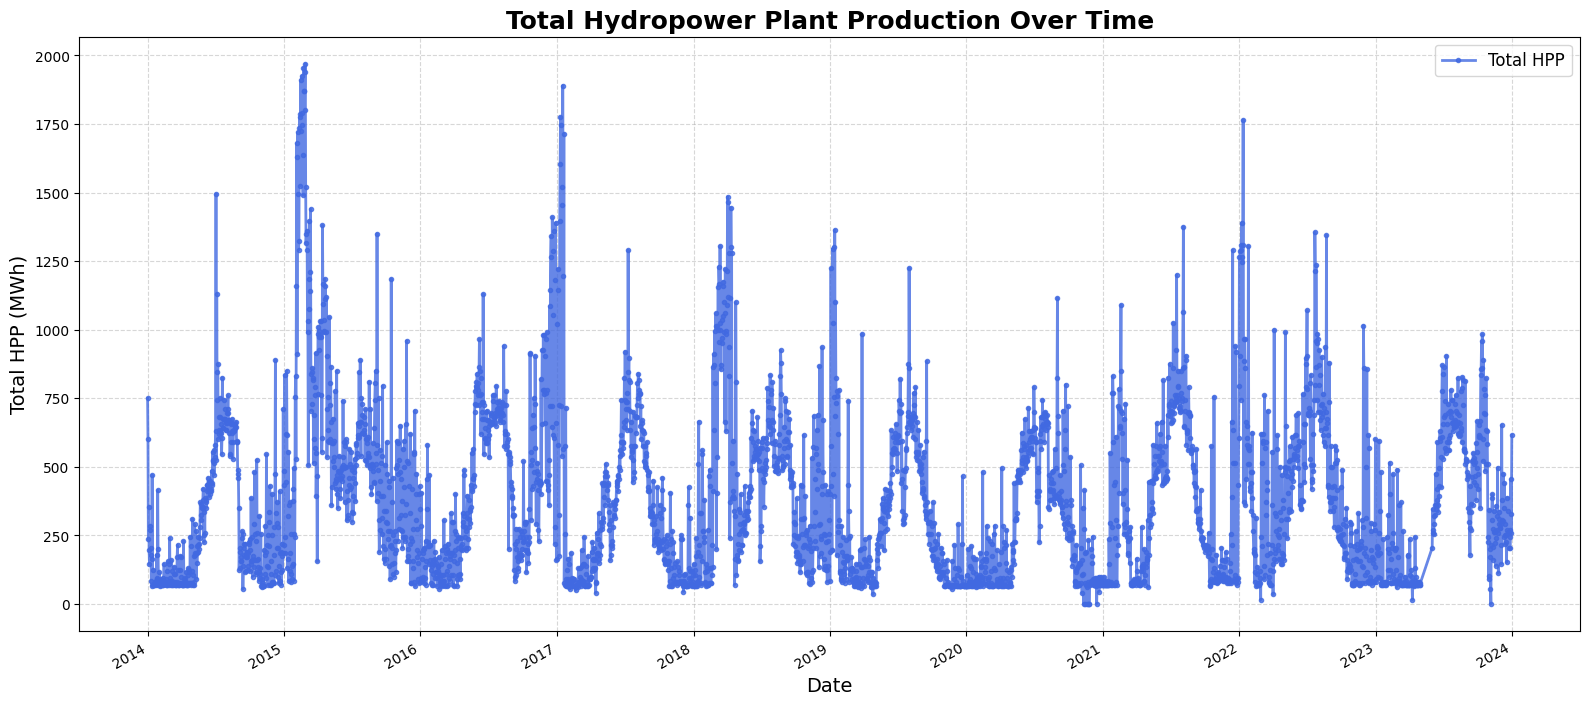

In [12]:
# Plot Total HPP vs Date 
plt.figure(figsize=(16, 7))
plt.plot(
    merged_df["Date"], merged_df["Total HPP"],
    marker='o', linestyle='-', color='royalblue', linewidth=2, markersize=3, alpha=0.8, label='Total HPP'
)
plt.title("Total Hydropower Plant Production Over Time", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Total HPP (MWh)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.xticks(rotation=30, ha='right')
plt.show()

Train/Test Split

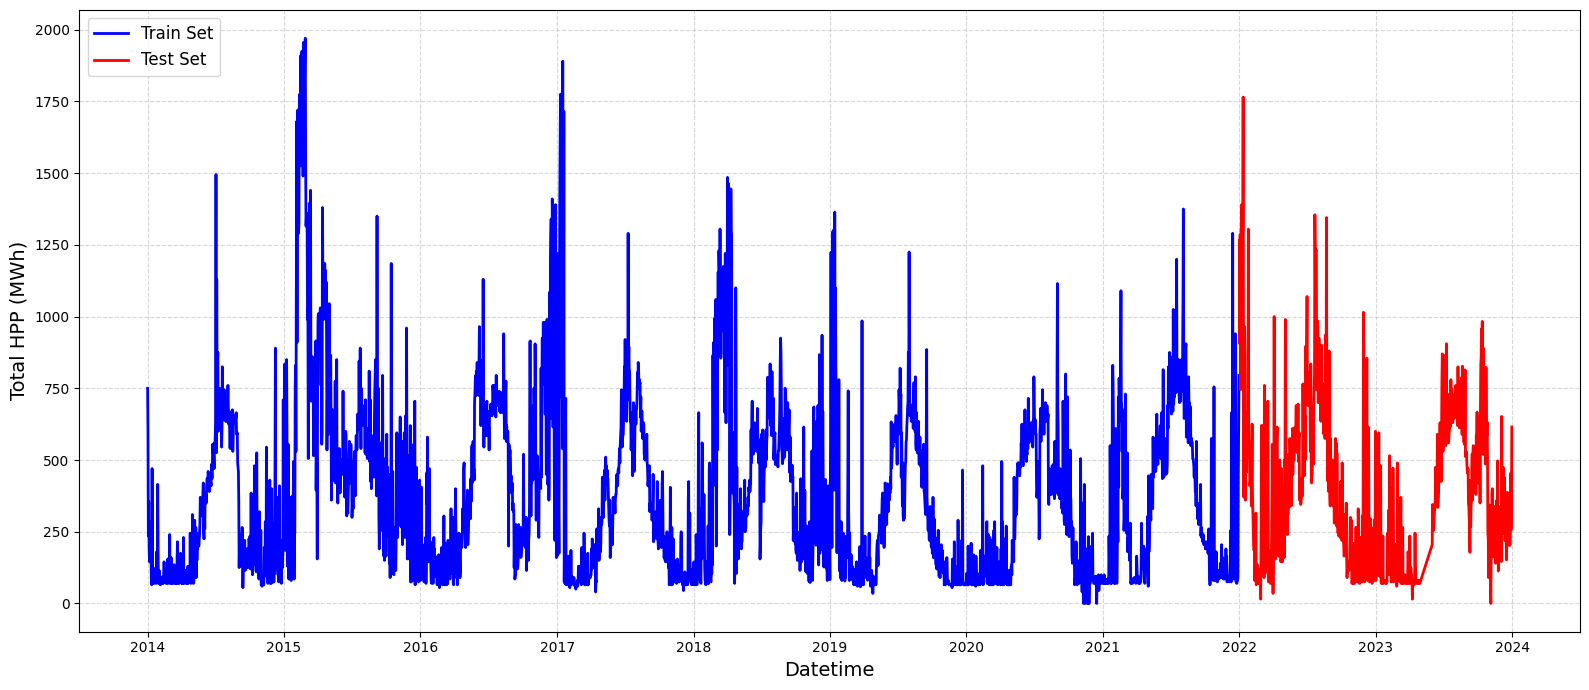

In [13]:
# Train/Test Split Plot (last 2 years as test set)
split_date = merged_df["Date"].max() - pd.DateOffset(years=2)
train_mask = merged_df["Date"] <= split_date
test_mask = merged_df["Date"] > split_date

plt.figure(figsize=(16, 7))
plt.plot(
    merged_df.loc[train_mask, "Date"],
    merged_df.loc[train_mask, "Total HPP"],
    color='blue', label='Train Set', linewidth=2
)
plt.plot(
    merged_df.loc[test_mask, "Date"],
    merged_df.loc[test_mask, "Total HPP"],
    color='red', label='Test Set', linewidth=2
)
#plt.title("Train/Test Split of Total HPP Time Series (Last 2 Years as Test)", fontsize=16)
plt.xlabel("Datetime", fontsize=14)
plt.ylabel("Total HPP (MWh)", fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

PROPHET MODEL

In [14]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.gofplots import qqplot # For Q-Q plot

Importing plotly failed. Interactive plots will not work.


Initial Finetuning

In [15]:
# Prophet hyperparameter finetuning: extended grid search for changepoint_prior_scale and seasonality_prior_scale
# Prepare Prophet data
prophet_df = merged_df[["Date", "Total HPP", "temperature_2m_mean", "precipitation_sum", "rain_sum"]].copy()
prophet_df = prophet_df.rename(columns={"Date": "ds", "Total HPP": "y"})

# Use the same train/test split as before
split_date = merged_df["Date"].max() - pd.DateOffset(years=2)
train_prophet_df = prophet_df[prophet_df["ds"] <= split_date]
val_prophet_df = prophet_df[prophet_df["ds"] > split_date]

regressors = ["temperature_2m_mean", "precipitation_sum", "rain_sum"]

# Extended hyperparameter grid
changepoint_scales = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5]
seasonality_scales = [1, 2, 5, 10, 20, 30, 50]

best_r2 = -np.inf
best_params = None
results = []

for cp_scale in changepoint_scales:
    for s_scale in seasonality_scales:
        print(f"Testing changepoint_prior_scale={cp_scale}, seasonality_prior_scale={s_scale}")
        m = Prophet(
            yearly_seasonality=True,
            weekly_seasonality=True,
            daily_seasonality=False,
            seasonality_mode='multiplicative',
            growth='linear',
            changepoint_prior_scale=cp_scale,
            seasonality_prior_scale=s_scale
        )
        for reg in regressors:
            m.add_regressor(reg)
        m.fit(train_prophet_df)
        future = val_prophet_df[["ds"] + regressors]
        forecast = m.predict(future)
        y_true = val_prophet_df["y"].values
        y_pred = forecast["yhat"].values
        r2 = r2_score(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        results.append({
            "changepoint_prior_scale": cp_scale,
            "seasonality_prior_scale": s_scale,
            "R2": r2,
            "MAE": mae,
            "RMSE": rmse
        })
        if r2 > best_r2:
            best_r2 = r2
            best_params = {"changepoint_prior_scale": cp_scale, "seasonality_prior_scale": s_scale}

# Show results
results_df = pd.DataFrame(results)
print("Prophet hyperparameter tuning results (sorted by R2):")
print(results_df.sort_values("R2", ascending=False))
print(f"\nBest params: {best_params}, Best R2: {best_r2:.4f}")

Testing changepoint_prior_scale=0.001, seasonality_prior_scale=1


14:47:05 - cmdstanpy - INFO - Chain [1] start processing
14:47:05 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.001, seasonality_prior_scale=2


14:47:06 - cmdstanpy - INFO - Chain [1] start processing
14:47:06 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.001, seasonality_prior_scale=5


14:47:07 - cmdstanpy - INFO - Chain [1] start processing
14:47:07 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.001, seasonality_prior_scale=10


14:47:08 - cmdstanpy - INFO - Chain [1] start processing
14:47:08 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.001, seasonality_prior_scale=20


14:47:09 - cmdstanpy - INFO - Chain [1] start processing
14:47:09 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.001, seasonality_prior_scale=30


14:47:10 - cmdstanpy - INFO - Chain [1] start processing
14:47:11 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.001, seasonality_prior_scale=50


14:47:12 - cmdstanpy - INFO - Chain [1] start processing
14:47:12 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.005, seasonality_prior_scale=1


14:47:13 - cmdstanpy - INFO - Chain [1] start processing
14:47:13 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.005, seasonality_prior_scale=2


14:47:14 - cmdstanpy - INFO - Chain [1] start processing
14:47:14 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.005, seasonality_prior_scale=5


14:47:15 - cmdstanpy - INFO - Chain [1] start processing
14:47:15 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.005, seasonality_prior_scale=10


14:47:16 - cmdstanpy - INFO - Chain [1] start processing
14:47:16 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.005, seasonality_prior_scale=20


14:47:17 - cmdstanpy - INFO - Chain [1] start processing
14:47:17 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.005, seasonality_prior_scale=30


14:47:18 - cmdstanpy - INFO - Chain [1] start processing
14:47:19 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.005, seasonality_prior_scale=50


14:47:19 - cmdstanpy - INFO - Chain [1] start processing
14:47:20 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.01, seasonality_prior_scale=1


14:47:21 - cmdstanpy - INFO - Chain [1] start processing
14:47:21 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.01, seasonality_prior_scale=2


14:47:22 - cmdstanpy - INFO - Chain [1] start processing
14:47:22 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.01, seasonality_prior_scale=5


14:47:23 - cmdstanpy - INFO - Chain [1] start processing
14:47:24 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.01, seasonality_prior_scale=10


14:47:24 - cmdstanpy - INFO - Chain [1] start processing
14:47:24 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.01, seasonality_prior_scale=20


14:47:25 - cmdstanpy - INFO - Chain [1] start processing
14:47:26 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.01, seasonality_prior_scale=30


14:47:26 - cmdstanpy - INFO - Chain [1] start processing
14:47:27 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.01, seasonality_prior_scale=50


14:47:27 - cmdstanpy - INFO - Chain [1] start processing
14:47:28 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.05, seasonality_prior_scale=1


14:47:29 - cmdstanpy - INFO - Chain [1] start processing
14:47:29 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.05, seasonality_prior_scale=2


14:47:30 - cmdstanpy - INFO - Chain [1] start processing
14:47:31 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.05, seasonality_prior_scale=5


14:47:32 - cmdstanpy - INFO - Chain [1] start processing
14:47:32 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.05, seasonality_prior_scale=10


14:47:33 - cmdstanpy - INFO - Chain [1] start processing
14:47:33 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.05, seasonality_prior_scale=20


14:47:34 - cmdstanpy - INFO - Chain [1] start processing
14:47:34 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.05, seasonality_prior_scale=30


14:47:35 - cmdstanpy - INFO - Chain [1] start processing
14:47:35 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.05, seasonality_prior_scale=50


14:47:36 - cmdstanpy - INFO - Chain [1] start processing
14:47:36 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.1, seasonality_prior_scale=1


14:47:37 - cmdstanpy - INFO - Chain [1] start processing
14:47:38 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.1, seasonality_prior_scale=2


14:47:38 - cmdstanpy - INFO - Chain [1] start processing
14:47:39 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.1, seasonality_prior_scale=5


14:47:40 - cmdstanpy - INFO - Chain [1] start processing
14:47:40 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.1, seasonality_prior_scale=10


14:47:41 - cmdstanpy - INFO - Chain [1] start processing
14:47:42 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.1, seasonality_prior_scale=20


14:47:42 - cmdstanpy - INFO - Chain [1] start processing
14:47:43 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.1, seasonality_prior_scale=30


14:47:44 - cmdstanpy - INFO - Chain [1] start processing
14:47:44 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.1, seasonality_prior_scale=50


14:47:45 - cmdstanpy - INFO - Chain [1] start processing
14:47:46 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.2, seasonality_prior_scale=1


14:47:46 - cmdstanpy - INFO - Chain [1] start processing
14:47:48 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.2, seasonality_prior_scale=2


14:47:49 - cmdstanpy - INFO - Chain [1] start processing
14:47:50 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.2, seasonality_prior_scale=5


14:47:51 - cmdstanpy - INFO - Chain [1] start processing
14:47:53 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.2, seasonality_prior_scale=10


14:47:55 - cmdstanpy - INFO - Chain [1] start processing
14:47:58 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.2, seasonality_prior_scale=20


14:47:58 - cmdstanpy - INFO - Chain [1] start processing
14:48:00 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.2, seasonality_prior_scale=30


14:48:01 - cmdstanpy - INFO - Chain [1] start processing
14:48:03 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.2, seasonality_prior_scale=50


14:48:03 - cmdstanpy - INFO - Chain [1] start processing
14:48:06 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.5, seasonality_prior_scale=1


14:48:07 - cmdstanpy - INFO - Chain [1] start processing
14:48:10 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.5, seasonality_prior_scale=2


14:48:11 - cmdstanpy - INFO - Chain [1] start processing
14:48:14 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.5, seasonality_prior_scale=5


14:48:15 - cmdstanpy - INFO - Chain [1] start processing
14:48:18 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.5, seasonality_prior_scale=10


14:48:19 - cmdstanpy - INFO - Chain [1] start processing
14:48:23 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.5, seasonality_prior_scale=20


14:48:24 - cmdstanpy - INFO - Chain [1] start processing
14:48:27 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.5, seasonality_prior_scale=30


14:48:28 - cmdstanpy - INFO - Chain [1] start processing
14:48:31 - cmdstanpy - INFO - Chain [1] done processing


Testing changepoint_prior_scale=0.5, seasonality_prior_scale=50


14:48:31 - cmdstanpy - INFO - Chain [1] start processing
14:48:34 - cmdstanpy - INFO - Chain [1] done processing


Prophet hyperparameter tuning results (sorted by R2):
    changepoint_prior_scale  seasonality_prior_scale        R2         MAE  \
13                    0.005                       50  0.190504  179.835717   
9                     0.005                        5  0.189352  179.904416   
8                     0.005                        2  0.182005  180.069305   
12                    0.005                       30  0.181584  180.495356   
7                     0.005                        1  0.180543  180.015281   
11                    0.005                       20  0.175462  180.967209   
10                    0.005                       10  0.172397  181.519343   
5                     0.001                       30  0.170682  184.893758   
4                     0.001                       20  0.170049  182.355318   
0                     0.001                        1  0.163943  187.392637   
17                    0.010                       10  0.161622  183.479354   
1         

Using existing 'merged_df' for Prophet analysis.

Training data range: 2014-01-01 to 2021-12-31
Validation data range: 2022-01-01 to 2023-12-31
Number of training samples: 2922
Number of validation samples: 699

--- Running Prophet Model (Weather Features Only, Best Params) ---
Fitting Prophet model...


12:05:30 - cmdstanpy - INFO - Chain [1] start processing
12:05:31 - cmdstanpy - INFO - Chain [1] done processing


Prophet model fitted.

--- Prophet (Weather Only, Best Params) Performance Statistics (Validation Set) ---
MAE: 179.8357 MWh
RMSE: 252.3356 MWh
MAPE: 1043528557.25%
SMAPE: 53.30%
R2 Score: 0.1905

--- Calculating Baseline Models ---

--- Naive (Persistence) Performance Statistics (Validation Set) ---
MAE: 428.8097 MWh
RMSE: 484.5003 MWh
MAPE: 11373390854.25%
SMAPE: 83.16%
R2 Score: -1.9843

--- Seasonal Naive (Weekly) Performance Statistics (Validation Set) ---
MAE: 164.4979 MWh
RMSE: 244.7474 MWh
MAPE: 3218884182.30%
SMAPE: 45.23%
R2 Score: 0.2385

--- Overall Model Performance Summary (R2 Scores) ---
Prophet (Weather Only, Best Params) R2: 0.1905
Naive (Persistence) R2: -1.9843
Seasonal Naive (Weekly) R2: 0.2385

--- Generating Plots ---


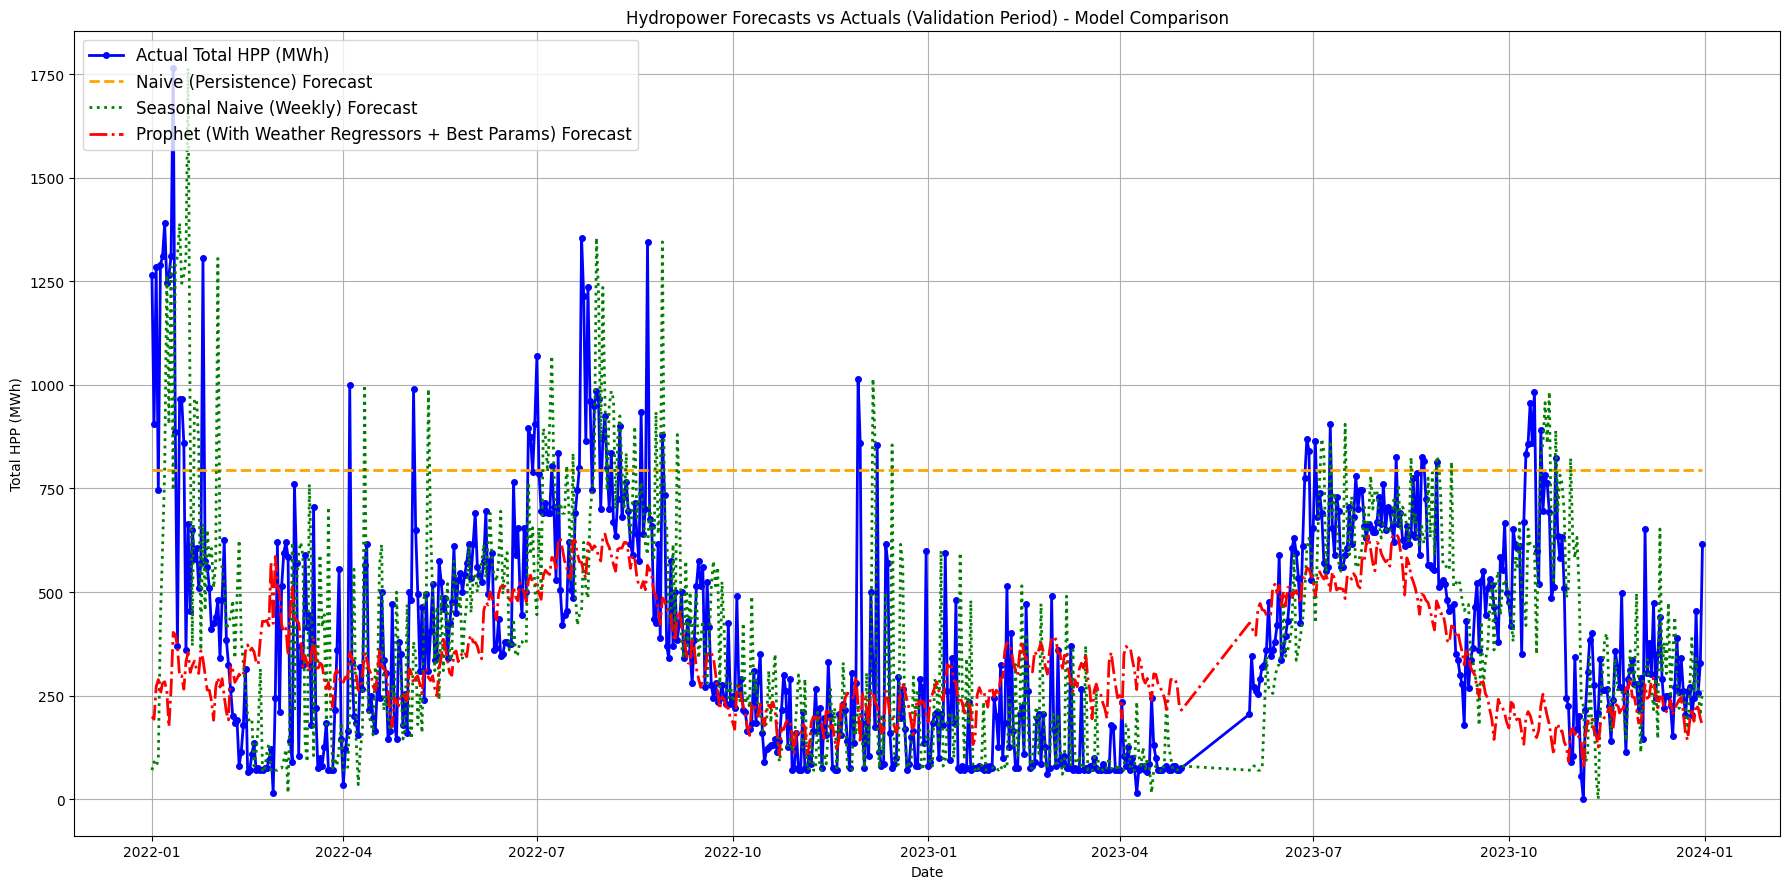


--- Generating Time Series Decomposition Plot ---
Multiplicative decomposition failed, trying additive model for decomposition.


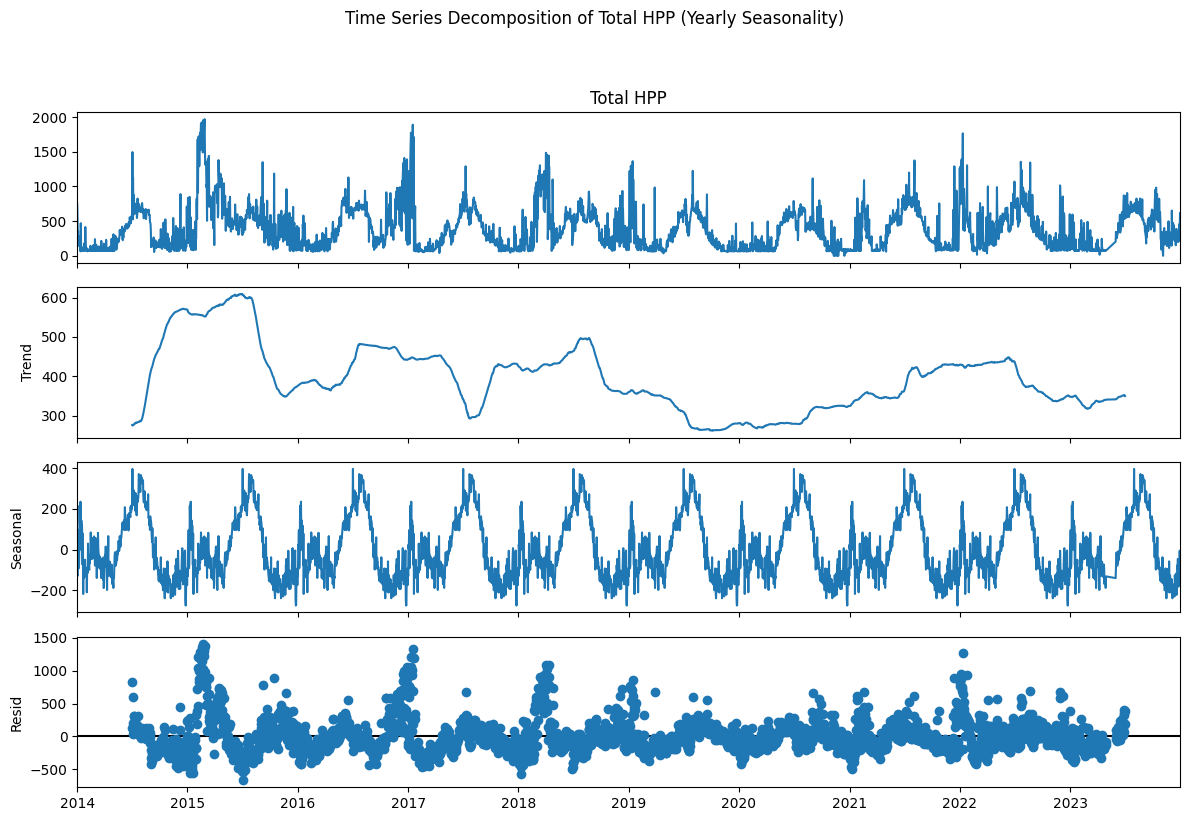


--- Generating Actual vs. Predicted Scatter Plot for Prophet ---


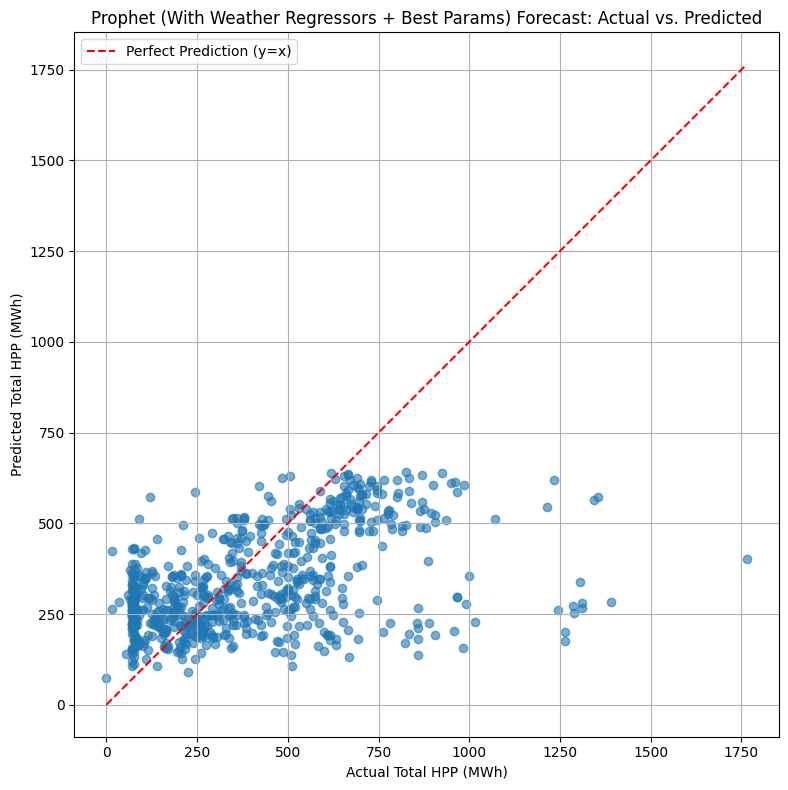


--- Generating Forecast Error Distribution Plots for Prophet ---


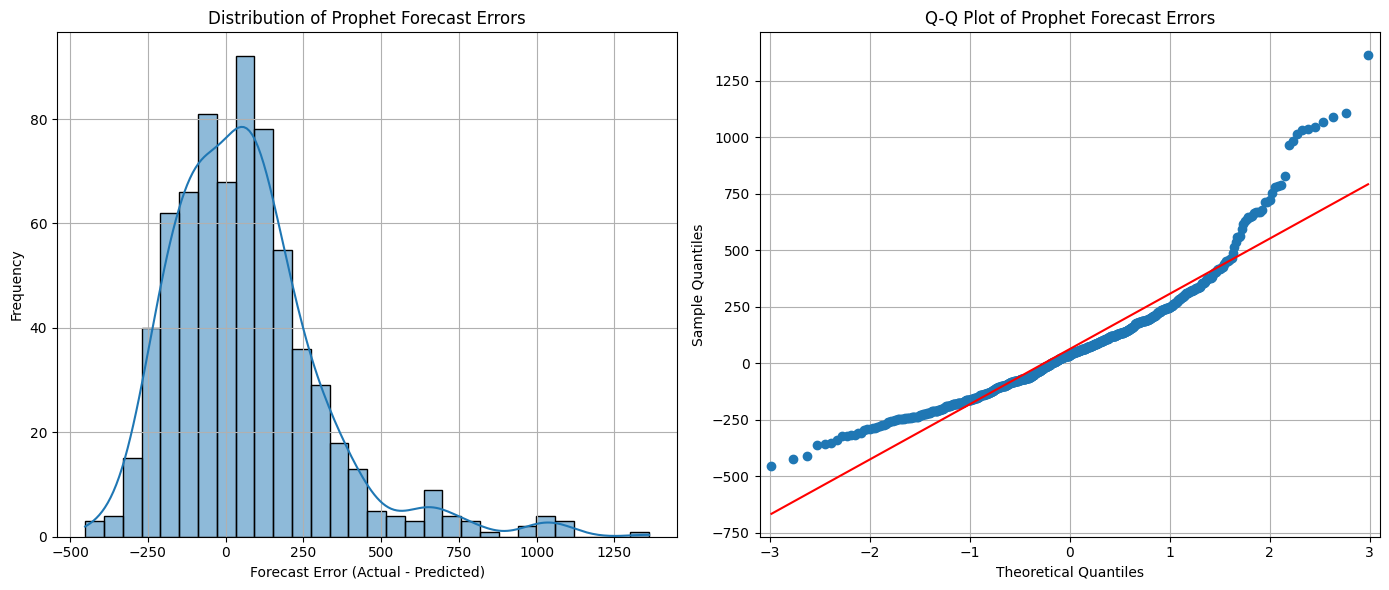

In [33]:
# --- Utility Functions for Metrics ---
def calculate_mape(y_true, y_pred):
    """Calculates Mean Absolute Percentage Error (MAPE)."""
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-8))) * 100

def calculate_smape(y_true, y_pred):
    """Calculates Symmetric Mean Absolute Percentage Error (SMAPE)."""
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(np.abs(y_pred - y_true) / np.maximum(denominator, 1e-8)) * 100

def print_metrics(model_name, y_true, y_pred):
    """Helper function to print common regression metrics."""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = calculate_mape(y_true, y_pred)
    smape = calculate_smape(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n--- {model_name} Performance Statistics (Validation Set) ---")
    print(f"MAE: {mae:.4f} MWh")
    print(f"RMSE: {rmse:.4f} MWh")
    print(f"MAPE: {mape:.2f}%")
    print(f"SMAPE: {smape:.2f}%")
    print(f"R2 Score: {r2:.4f}")
    return {"MAE": mae, "RMSE": rmse, "MAPE": mape, "SMAPE": smape, "R2": r2}

# --- 1. Initial Data Preparation (using existing merged_df) ---
print("Using existing 'merged_df' for Prophet analysis.")
target_column = "Total HPP"
# Ensure 'Total HPP' is float (redundant if already done, but safe)
merged_df[target_column] = merged_df[target_column].astype(float)
# Ensure 'Date' is datetime (redundant if already done, but safe)
merged_df["Date"] = pd.to_datetime(merged_df["Date"])
# Ensure data is sorted by date and time_idx is sequential for splitting
merged_df = merged_df.sort_values(by="Date").reset_index(drop=True)
if "time_idx" not in merged_df.columns:
    merged_df["time_idx"] = np.arange(len(merged_df))

# --- 2. Data Splitting (last 2 years as test set, as requested) ---
split_date = merged_df["Date"].max() - pd.DateOffset(years=2)
train_df = merged_df[merged_df["Date"] <= split_date].copy()
val_df = merged_df[merged_df["Date"] > split_date].copy()

validation_start_date = val_df["Date"].min()
validation_end_date = val_df["Date"].max()

print(f"\nTraining data range: {train_df['Date'].min().strftime('%Y-%m-%d')} to {train_df['Date'].max().strftime('%Y-%m-%d')}")
print(f"Validation data range: {validation_start_date.strftime('%Y-%m-%d')} to {validation_end_date.strftime('%Y-%m-%d')}")
print(f"Number of training samples: {len(train_df)}")
print(f"Number of validation samples: {len(val_df)}")

# --- 3. Prophet Model Setup and Training (Weather Features Only, with best params) ---
print("\n--- Running Prophet Model (Weather Features Only, Best Params) ---")
prophet_df = merged_df[["Date", target_column, "temperature_2m_mean", "precipitation_sum", "rain_sum"]].copy()
prophet_df = prophet_df.rename(columns={"Date": "ds", target_column: "y"})

train_prophet_df = prophet_df[prophet_df["ds"] <= split_date]
val_prophet_df = prophet_df[prophet_df["ds"] > split_date]

best_params = {'changepoint_prior_scale': 0.005, 'seasonality_prior_scale': 50}
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    growth='linear',
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale']
)

regressors = ["temperature_2m_mean", "precipitation_sum", "rain_sum"]
for regressor in regressors:
    m.add_regressor(regressor)

print("Fitting Prophet model...")
m.fit(train_prophet_df)
print("Prophet model fitted.")

# Make predictions for the validation period
future_df = val_prophet_df[['ds'] + regressors].copy() # Must include regressors for future
forecast = m.predict(future_df)

prophet_y_pred = forecast['yhat'].values
prophet_y_true = val_prophet_df['y'].values # Actuals for Prophet's validation set

prophet_metrics = print_metrics("Prophet (Weather Only, Best Params)", prophet_y_true, prophet_y_pred)

# --- 4. Baseline Models Calculation ---
print("\n--- Calculating Baseline Models ---")

# Naive (Persistence) Forecast
last_training_value = train_df[target_column].iloc[-1] # Last value of training set
naive_predictions = np.full_like(prophet_y_true, last_training_value)
naive_metrics = print_metrics("Naive (Persistence)", prophet_y_true, naive_predictions)

# Seasonal Naive (Weekly) Forecast
seasonal_naive_predictions = np.zeros_like(prophet_y_true, dtype=float)
# Get actuals from the week prior to the validation period (from merged_df, spanning into training data)
start_date_prev_week = validation_start_date - pd.Timedelta(days=7)
end_date_prev_week = validation_end_date - pd.Timedelta(days=7)

previous_week_actuals_df = merged_df[(merged_df["Date"] >= start_date_prev_week) &
                                    (merged_df["Date"] <= end_date_prev_week)
                                    ].copy()

if len(previous_week_actuals_df) >= len(prophet_y_true):
    seasonal_naive_predictions = previous_week_actuals_df[target_column].values[:len(prophet_y_true)]
else:
    # Fallback for short history (pad with naive forecast)
    padding_needed = len(prophet_y_true) - len(previous_week_actuals_df)
    seasonal_naive_predictions = np.concatenate([
        previous_week_actuals_df[target_column].values,
        np.full(padding_needed, last_training_value)
    ])
seasonal_naive_metrics = print_metrics("Seasonal Naive (Weekly)", prophet_y_true, seasonal_naive_predictions)

# --- 5. Overall Model Performance Summary ---
print("\n--- Overall Model Performance Summary (R2 Scores) ---")
print(f"Prophet (Weather Only, Best Params) R2: {prophet_metrics['R2']:.4f}")
print(f"Naive (Persistence) R2: {naive_metrics['R2']:.4f}")
print(f"Seasonal Naive (Weekly) R2: {seasonal_naive_metrics['R2']:.4f}")

# --- 6. Plotting ---
print("\n--- Generating Plots ---")

# Get the dates for the validation period (x-axis for plots)
val_dates_for_plot = val_prophet_df['ds'].values

# Combined Plot: Actuals vs. All Forecasts
plt.figure(figsize=(18, 9))
plt.plot(val_dates_for_plot, prophet_y_true, label='Actual Total HPP (MWh)', color='blue', linewidth=2, marker='o', markersize=4)
plt.plot(val_dates_for_plot, naive_predictions, label='Naive (Persistence) Forecast', color='orange', linestyle='--', linewidth=2)
plt.plot(val_dates_for_plot, seasonal_naive_predictions, label='Seasonal Naive (Weekly) Forecast', color='green', linestyle=':', linewidth=2)
plt.plot(val_dates_for_plot, prophet_y_pred, label='Prophet (With Weather Regressors + Best Params) Forecast', color='red', linestyle='-.', linewidth=2)

plt.title('Hydropower Forecasts vs Actuals (Validation Period) - Model Comparison')
plt.xlabel('Date')
plt.ylabel('Total HPP (MWh)')
plt.legend(loc='upper left', fontsize=12, frameon=True)  # Legend inside the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Time Series Decomposition Plot (using the full merged_df)
print("\n--- Generating Time Series Decomposition Plot ---")
indexed_df = merged_df.set_index("Date").copy()
indexed_df.index = pd.to_datetime(indexed_df.index)

try:
    decomposition = seasonal_decompose(indexed_df[target_column], model='multiplicative', period=365) # Yearly seasonality
except ValueError:
    print("Multiplicative decomposition failed, trying additive model for decomposition.")
    decomposition = seasonal_decompose(indexed_df[target_column], model='additive', period=365)

fig_decomp = decomposition.plot()
fig_decomp.set_size_inches(12, 8)
fig_decomp.suptitle('Time Series Decomposition of Total HPP (Yearly Seasonality)', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Actual vs. Predicted (Scatter Plot for Prophet)
print("\n--- Generating Actual vs. Predicted Scatter Plot for Prophet ---")
plt.figure(figsize=(8, 8))
plt.scatter(prophet_y_true, prophet_y_pred, alpha=0.6)
plt.plot([min(prophet_y_true), max(prophet_y_true)], [min(prophet_y_true), max(prophet_y_true)],
         color='red', linestyle='--', label='Perfect Prediction (y=x)')

plt.title('Prophet (With Weather Regressors + Best Params) Forecast: Actual vs. Predicted')
plt.xlabel('Actual Total HPP (MWh)')
plt.ylabel('Predicted Total HPP (MWh)')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

# Forecast Error Distribution (Histogram and Q-Q Plot for Prophet)
print("\n--- Generating Forecast Error Distribution Plots for Prophet ---")
forecast_errors = prophet_y_true - prophet_y_pred

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(forecast_errors, kde=True, bins=30)
plt.title('Distribution of Prophet Forecast Errors')
plt.xlabel('Forecast Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
qqplot(forecast_errors, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Prophet Forecast Errors')
plt.grid(True)

plt.tight_layout()
plt.show()

Trying with maintenance regressors

In [51]:
# Grid search for Prophet wit maintenance regressors
maintenance_cols = [
    'Unit I Maintenance Plant', 'Unit I Maintenance Outside',
    'Unit I Failure Plant', 'Unit I Failure Outside',
    'Unit II Maintenance Plant', 'Unit II Maintenance Outside',
    'Unit II Failure Plant', 'Unit II Failure Outside',
    'Number of Starts Unit I', 'Number of Starts Unit II'
]
all_regressors = maintenance_cols

# Prepare Prophet dataframe with all regressors
prophet_df_all = merged_df[['Date', target_column] + all_regressors].copy()
prophet_df_all = prophet_df_all.rename(columns={'Date': 'ds', target_column: 'y'})

train_prophet_df_all = prophet_df_all[prophet_df_all['ds'] <= split_date]
val_prophet_df_all = prophet_df_all[prophet_df_all['ds'] > split_date]

changepoint_scales = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5]
seasonality_scales = [1, 2, 5, 10, 20, 30, 50]

best_r2_all = -np.inf
best_params_all = None
results_all = []

for cp_scale in changepoint_scales:
    for s_scale in seasonality_scales:
        print(f"Testing (all reg): changepoint_prior_scale={cp_scale}, seasonality_prior_scale={s_scale}")
        m_all = Prophet(
            yearly_seasonality=True,
            weekly_seasonality=True,
            daily_seasonality=False,
            seasonality_mode='multiplicative',
            growth='linear',
            changepoint_prior_scale=cp_scale,
            seasonality_prior_scale=s_scale
        )
        for reg in all_regressors:
            m_all.add_regressor(reg)
        m_all.fit(train_prophet_df_all)
        future_all = val_prophet_df_all[['ds'] + all_regressors]
        forecast_all = m_all.predict(future_all)
        y_true_all = val_prophet_df_all['y'].values
        y_pred_all = forecast_all['yhat'].values
        r2_all = r2_score(y_true_all, y_pred_all)
        mae_all = mean_absolute_error(y_true_all, y_pred_all)
        rmse_all = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
        results_all.append({
            "changepoint_prior_scale": cp_scale,
            "seasonality_prior_scale": s_scale,
            "R2": r2_all,
            "MAE": mae_all,
            "RMSE": rmse_all
        })
        if r2_all > best_r2_all:
            best_r2_all = r2_all
            best_params_all = {"changepoint_prior_scale": cp_scale, "seasonality_prior_scale": s_scale}

# Show results
results_df_all = pd.DataFrame(results_all)
print("Prophet (weather + maintenance regressors) hyperparameter tuning results (sorted by R2):")
print(results_df_all.sort_values("R2", ascending=False))
print(f"\nBest params (all reg): {best_params_all}, Best R2: {best_r2_all:.4f}")

Testing (all reg): changepoint_prior_scale=0.001, seasonality_prior_scale=1


16:26:43 - cmdstanpy - INFO - Chain [1] start processing
16:26:43 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.001, seasonality_prior_scale=2


16:26:44 - cmdstanpy - INFO - Chain [1] start processing
16:26:44 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.001, seasonality_prior_scale=5


16:26:45 - cmdstanpy - INFO - Chain [1] start processing
16:26:45 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.001, seasonality_prior_scale=10


16:26:46 - cmdstanpy - INFO - Chain [1] start processing
16:26:47 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.001, seasonality_prior_scale=20


16:26:47 - cmdstanpy - INFO - Chain [1] start processing
16:26:48 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.001, seasonality_prior_scale=30


16:26:48 - cmdstanpy - INFO - Chain [1] start processing
16:26:49 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.001, seasonality_prior_scale=50


16:26:49 - cmdstanpy - INFO - Chain [1] start processing
16:26:50 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.005, seasonality_prior_scale=1


16:26:51 - cmdstanpy - INFO - Chain [1] start processing
16:26:51 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.005, seasonality_prior_scale=2


16:26:52 - cmdstanpy - INFO - Chain [1] start processing
16:26:52 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.005, seasonality_prior_scale=5


16:26:53 - cmdstanpy - INFO - Chain [1] start processing
16:26:54 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.005, seasonality_prior_scale=10


16:26:55 - cmdstanpy - INFO - Chain [1] start processing
16:26:55 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.005, seasonality_prior_scale=20


16:26:56 - cmdstanpy - INFO - Chain [1] start processing
16:26:56 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.005, seasonality_prior_scale=30


16:26:57 - cmdstanpy - INFO - Chain [1] start processing
16:26:57 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.005, seasonality_prior_scale=50


16:26:58 - cmdstanpy - INFO - Chain [1] start processing
16:26:58 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.01, seasonality_prior_scale=1


16:26:59 - cmdstanpy - INFO - Chain [1] start processing
16:26:59 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.01, seasonality_prior_scale=2


16:27:00 - cmdstanpy - INFO - Chain [1] start processing
16:27:01 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.01, seasonality_prior_scale=5


16:27:01 - cmdstanpy - INFO - Chain [1] start processing
16:27:02 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.01, seasonality_prior_scale=10


16:27:02 - cmdstanpy - INFO - Chain [1] start processing
16:27:03 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.01, seasonality_prior_scale=20


16:27:04 - cmdstanpy - INFO - Chain [1] start processing
16:27:04 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.01, seasonality_prior_scale=30


16:27:05 - cmdstanpy - INFO - Chain [1] start processing
16:27:05 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.01, seasonality_prior_scale=50


16:27:06 - cmdstanpy - INFO - Chain [1] start processing
16:27:07 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.05, seasonality_prior_scale=1


16:27:07 - cmdstanpy - INFO - Chain [1] start processing
16:27:08 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.05, seasonality_prior_scale=2


16:27:09 - cmdstanpy - INFO - Chain [1] start processing
16:27:09 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.05, seasonality_prior_scale=5


16:27:10 - cmdstanpy - INFO - Chain [1] start processing
16:27:11 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.05, seasonality_prior_scale=10


16:27:12 - cmdstanpy - INFO - Chain [1] start processing
16:27:12 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.05, seasonality_prior_scale=20


16:27:13 - cmdstanpy - INFO - Chain [1] start processing
16:27:14 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.05, seasonality_prior_scale=30


16:27:15 - cmdstanpy - INFO - Chain [1] start processing
16:27:15 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.05, seasonality_prior_scale=50


16:27:16 - cmdstanpy - INFO - Chain [1] start processing
16:27:17 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.1, seasonality_prior_scale=1


16:27:17 - cmdstanpy - INFO - Chain [1] start processing
16:27:18 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.1, seasonality_prior_scale=2


16:27:19 - cmdstanpy - INFO - Chain [1] start processing
16:27:19 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.1, seasonality_prior_scale=5


16:27:20 - cmdstanpy - INFO - Chain [1] start processing
16:27:21 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.1, seasonality_prior_scale=10


16:27:22 - cmdstanpy - INFO - Chain [1] start processing
16:27:23 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.1, seasonality_prior_scale=20


16:27:24 - cmdstanpy - INFO - Chain [1] start processing
16:27:25 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.1, seasonality_prior_scale=30


16:27:26 - cmdstanpy - INFO - Chain [1] start processing
16:27:27 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.1, seasonality_prior_scale=50


16:27:28 - cmdstanpy - INFO - Chain [1] start processing
16:27:28 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.2, seasonality_prior_scale=1


16:27:29 - cmdstanpy - INFO - Chain [1] start processing
16:27:31 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.2, seasonality_prior_scale=2


16:27:32 - cmdstanpy - INFO - Chain [1] start processing
16:27:34 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.2, seasonality_prior_scale=5


16:27:34 - cmdstanpy - INFO - Chain [1] start processing
16:27:36 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.2, seasonality_prior_scale=10


16:27:37 - cmdstanpy - INFO - Chain [1] start processing
16:27:39 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.2, seasonality_prior_scale=20


16:27:40 - cmdstanpy - INFO - Chain [1] start processing
16:27:41 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.2, seasonality_prior_scale=30


16:27:42 - cmdstanpy - INFO - Chain [1] start processing
16:27:44 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.2, seasonality_prior_scale=50


16:27:45 - cmdstanpy - INFO - Chain [1] start processing
16:27:46 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.5, seasonality_prior_scale=1


16:27:47 - cmdstanpy - INFO - Chain [1] start processing
16:27:49 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.5, seasonality_prior_scale=2


16:27:50 - cmdstanpy - INFO - Chain [1] start processing
16:27:52 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.5, seasonality_prior_scale=5


16:27:53 - cmdstanpy - INFO - Chain [1] start processing
16:27:56 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.5, seasonality_prior_scale=10


16:27:56 - cmdstanpy - INFO - Chain [1] start processing
16:27:59 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.5, seasonality_prior_scale=20


16:28:00 - cmdstanpy - INFO - Chain [1] start processing
16:28:03 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.5, seasonality_prior_scale=30


16:28:04 - cmdstanpy - INFO - Chain [1] start processing
16:28:06 - cmdstanpy - INFO - Chain [1] done processing


Testing (all reg): changepoint_prior_scale=0.5, seasonality_prior_scale=50


16:28:06 - cmdstanpy - INFO - Chain [1] start processing
16:28:10 - cmdstanpy - INFO - Chain [1] done processing


Prophet (weather + maintenance regressors) hyperparameter tuning results (sorted by R2):
    changepoint_prior_scale  seasonality_prior_scale        R2         MAE  \
4                     0.001                       20  0.477826  136.751609   
3                     0.001                       10  0.473875  137.487614   
27                    0.050                       50  0.468731  138.127311   
25                    0.050                       20  0.466791  138.649144   
23                    0.050                        5  0.465921  138.921420   
2                     0.001                        5  0.465332  138.067436   
26                    0.050                       30  0.465312  139.059847   
22                    0.050                        2  0.465310  139.089194   
24                    0.050                       10  0.462129  139.936276   
13                    0.005                       50  0.460569  138.789112   
11                    0.005                       20 

Fitting Prophet model with all regressors and best params...


17:13:02 - cmdstanpy - INFO - Chain [1] start processing
17:13:03 - cmdstanpy - INFO - Chain [1] done processing


Prophet model fitted.

--- Prophet (Maintenance Regressors, Best Params) Performance Statistics (Validation Set) ---
MAE: 136.7516 MWh
RMSE: 202.6649 MWh
MAPE: 1265048419.90%
SMAPE: 43.14%
R2 Score: 0.4778


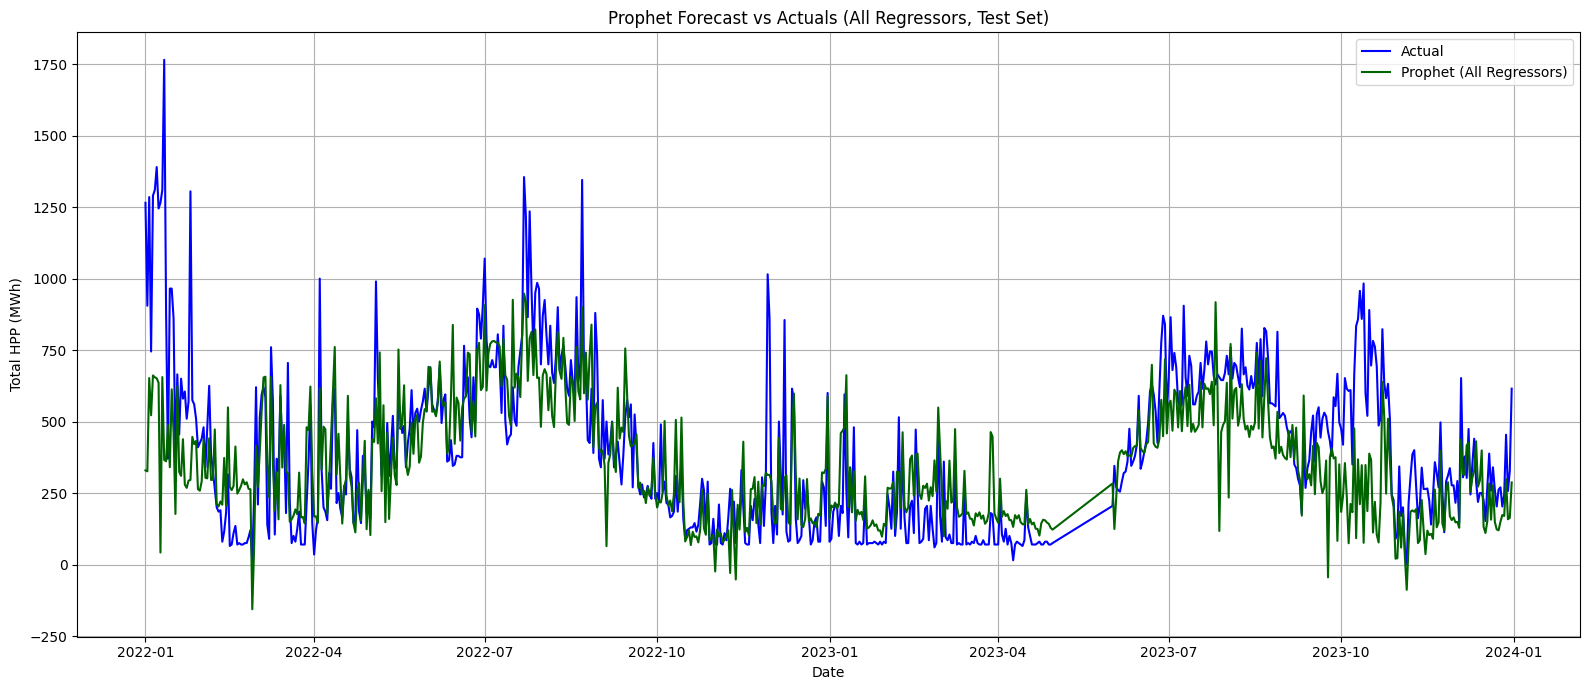

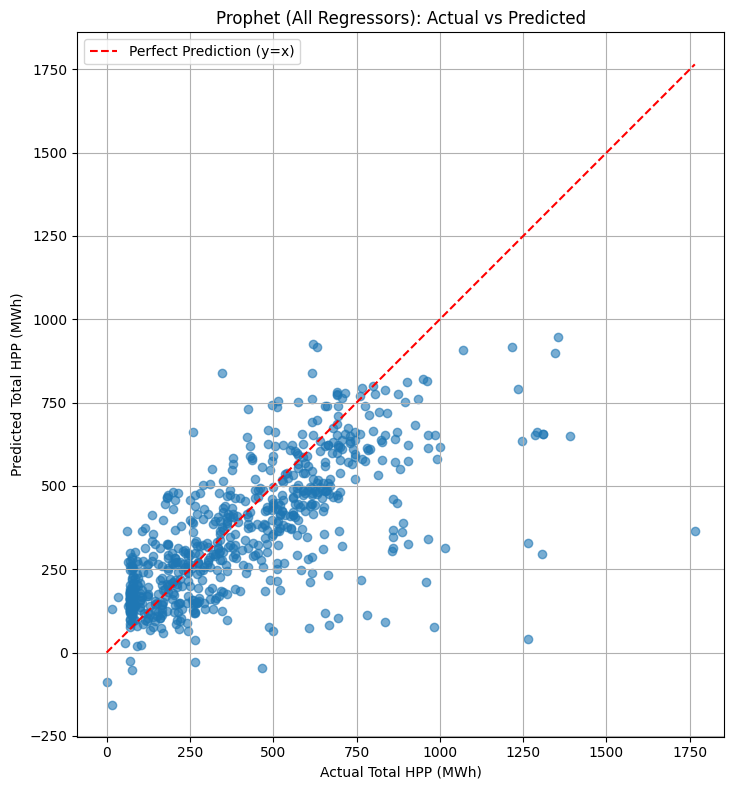

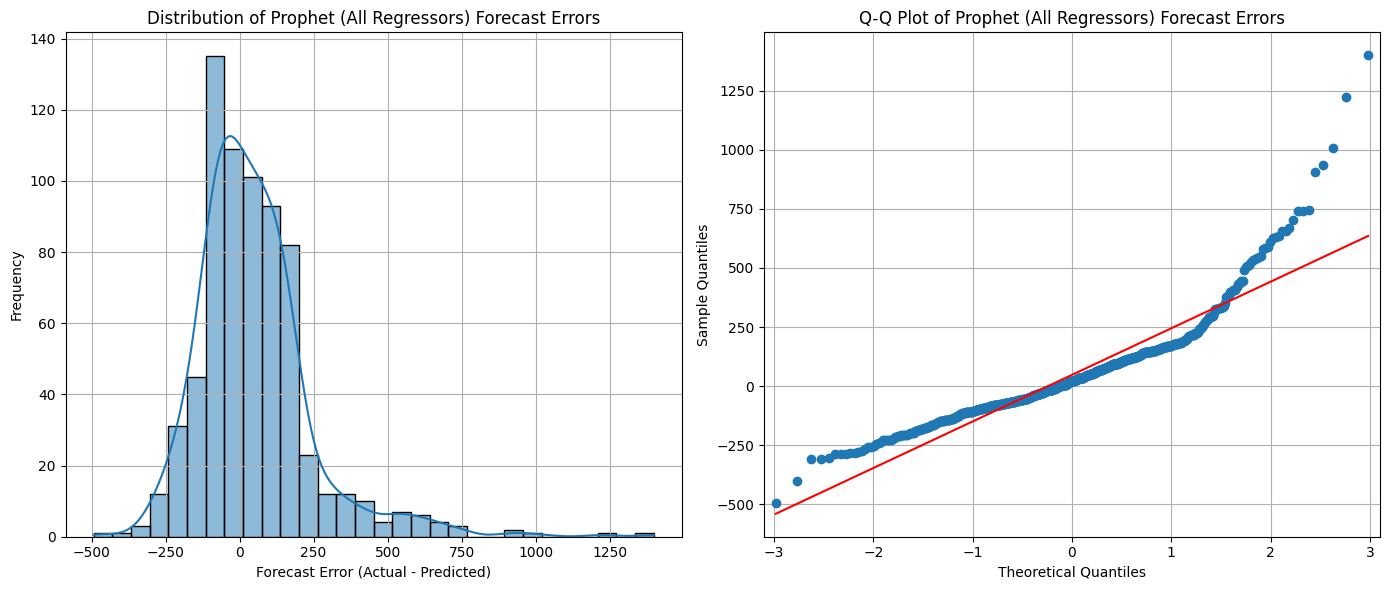

In [57]:
# Use the best parameters found from the grid search above
best_params_all = {  # <-- Replace with your actual best params if different
    "changepoint_prior_scale": 0.001,
    "seasonality_prior_scale": 20
}

maintenance_cols = [
    'Unit I Maintenance Plant', 'Unit I Maintenance Outside',
    'Unit I Failure Plant', 'Unit I Failure Outside',
    'Unit II Maintenance Plant', 'Unit II Maintenance Outside',
    'Unit II Failure Plant', 'Unit II Failure Outside',
    'Number of Starts Unit I', 'Number of Starts Unit II'
]
all_regressors = maintenance_cols

# Prepare Prophet dataframe with all regressors
prophet_df_all = merged_df[['Date', target_column] + all_regressors].copy()
prophet_df_all = prophet_df_all.rename(columns={'Date': 'ds', target_column: 'y'})

train_prophet_df_all = prophet_df_all[prophet_df_all['ds'] <= split_date]
val_prophet_df_all = prophet_df_all[prophet_df_all['ds'] > split_date]

# Fit Prophet with all regressors and best params
m_all = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    growth='linear',
    changepoint_prior_scale=best_params_all['changepoint_prior_scale'],
    seasonality_prior_scale=best_params_all['seasonality_prior_scale']
)
for reg in all_regressors:
    m_all.add_regressor(reg)

print("Fitting Prophet model with all regressors and best params...")
m_all.fit(train_prophet_df_all)
print("Prophet model fitted.")

# Predict
future_df_all = val_prophet_df_all[['ds'] + all_regressors].copy()
forecast_all = m_all.predict(future_df_all)

# Evaluate
y_true_all = val_prophet_df_all['y'].values
y_pred_all = forecast_all['yhat'].values
prophet_metrics_all = print_metrics("Prophet (Maintenance Regressors, Best Params)", y_true_all, y_pred_all)

# --- Plot Actual vs Predicted ---
plt.figure(figsize=(16, 7))
plt.plot(val_prophet_df_all["ds"], y_true_all, label="Actual", color="blue")
plt.plot(val_prophet_df_all["ds"], y_pred_all, label="Prophet (All Regressors)", color="darkgreen")
plt.title("Prophet Forecast vs Actuals (All Regressors, Test Set)")
plt.xlabel("Date")
plt.ylabel("Total HPP (MWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Scatter Plot ---
plt.figure(figsize=(8, 8))
plt.scatter(y_true_all, y_pred_all, alpha=0.6)
plt.plot([min(y_true_all), max(y_true_all)], [min(y_true_all), max(y_true_all)],
         color='red', linestyle='--', label='Perfect Prediction (y=x)')
plt.title('Prophet (All Regressors): Actual vs Predicted')
plt.xlabel('Actual Total HPP (MWh)')
plt.ylabel('Predicted Total HPP (MWh)')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

# --- Error Distribution ---
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

forecast_errors_all = y_true_all - y_pred_all

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(forecast_errors_all, kde=True, bins=30)
plt.title('Distribution of Prophet (All Regressors) Forecast Errors')
plt.xlabel('Forecast Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
qqplot(forecast_errors_all, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Prophet (All Regressors) Forecast Errors')
plt.grid(True)

plt.tight_layout()
plt.show()

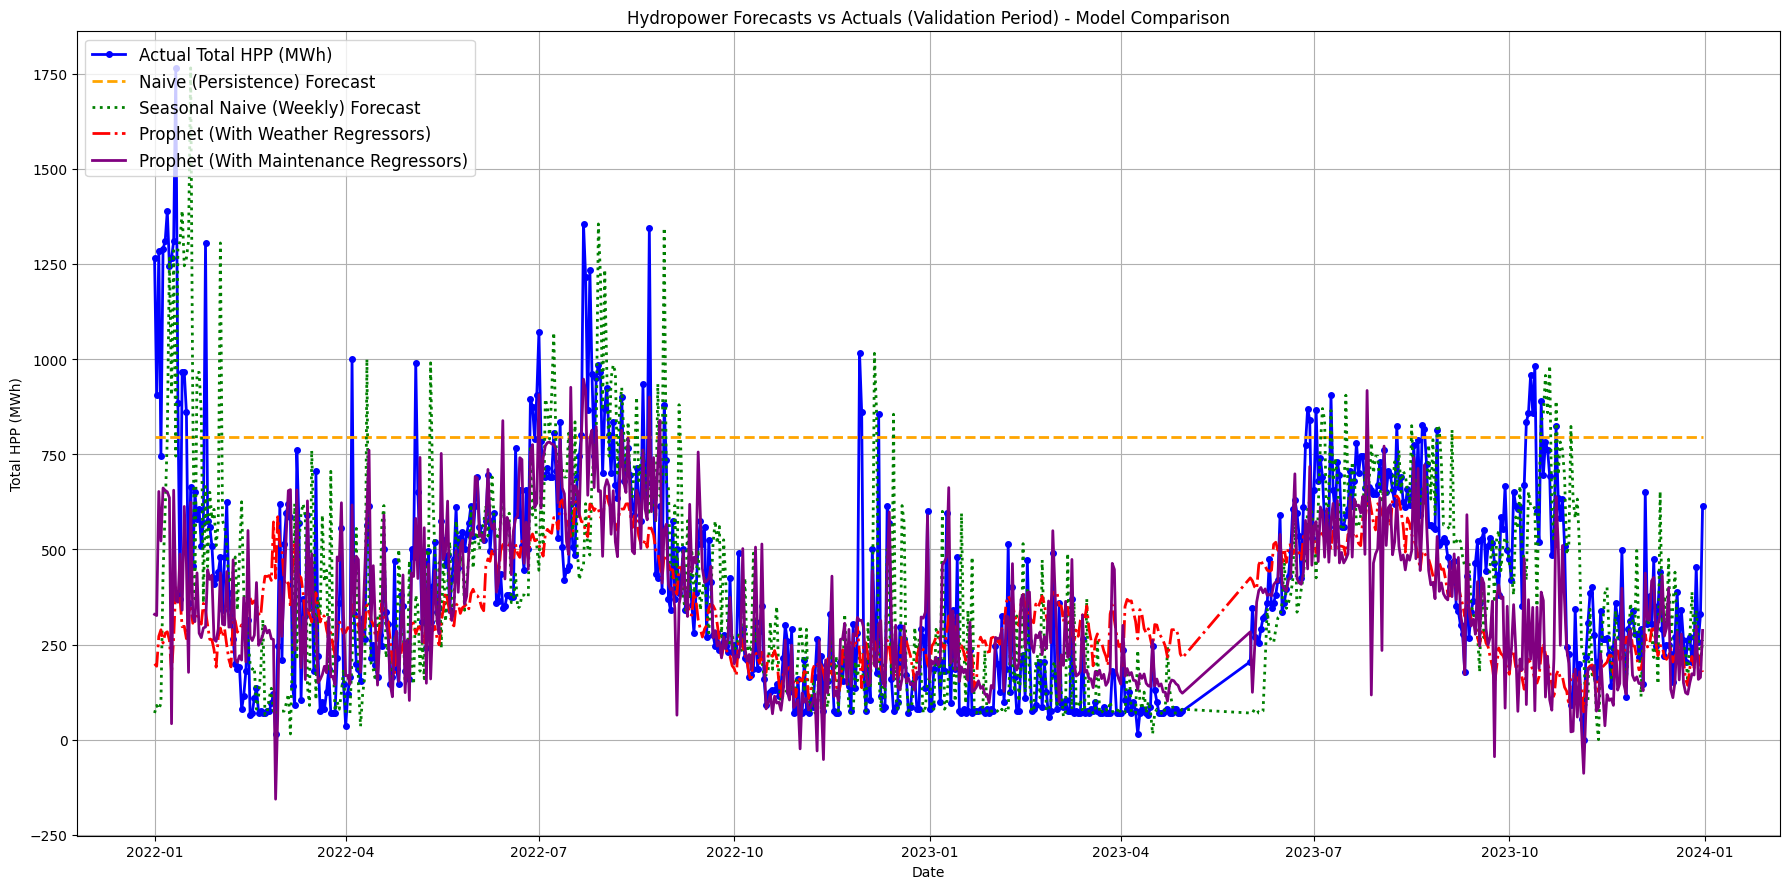

In [53]:
# Combined Plot: Actuals vs. All Forecasts
plt.figure(figsize=(18, 9))
plt.plot(val_dates_for_plot, prophet_y_true, label='Actual Total HPP (MWh)', color='blue', linewidth=2, marker='o', markersize=4)
plt.plot(val_dates_for_plot, naive_predictions, label='Naive (Persistence) Forecast', color='orange', linestyle='--', linewidth=2)
plt.plot(val_dates_for_plot, seasonal_naive_predictions, label='Seasonal Naive (Weekly) Forecast', color='green', linestyle=':', linewidth=2)
plt.plot(val_dates_for_plot, prophet_y_pred, label='Prophet (With Weather Regressors)', color='red', linestyle='-.', linewidth=2)
plt.plot(val_dates_for_plot, y_pred_all, label='Prophet (With Maintenance Regressors)', color='purple', linestyle='-', linewidth=2)

plt.title('Hydropower Forecasts vs Actuals (Validation Period) - Model Comparison')
plt.xlabel('Date')
plt.ylabel('Total HPP (MWh)')
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.grid(True)
plt.tight_layout()
plt.show()

# 1. Prepare Prophet Data for 1-Week Ahead Forecast

We will prepare the data for a 1-week ahead forecast using the most recent available training data. The Prophet-compatible DataFrame will be created, and a DataFrame for the next 7 days will be generated for prediction.

In [54]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# Assume merged_df is already loaded and preprocessed as in previous analysis
# Ensure 'Date' is datetime and sorted
merged_df = merged_df.sort_values("Date").reset_index(drop=True)
merged_df["Date"] = pd.to_datetime(merged_df["Date"])

# Prepare Prophet DataFrame (no weather regressors)
prophet_df = merged_df[["Date", "Total HPP"]].copy()
prophet_df = prophet_df.rename(columns={"Date": "ds", "Total HPP": "y"})

# Use all available data for training
train_prophet_df = prophet_df.copy()

# Prepare DataFrame for next 7 days (future)
last_date = train_prophet_df["ds"].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7, freq="D")
future_df = pd.DataFrame({"ds": future_dates})

print("Prepared Prophet training data up to:", last_date.strftime("%Y-%m-%d"))
print("Prepared future DataFrame for next 7 days:")
print(future_df)

Prepared Prophet training data up to: 2023-12-31
Prepared future DataFrame for next 7 days:
          ds
0 2024-01-01
1 2024-01-02
2 2024-01-03
3 2024-01-04
4 2024-01-05
5 2024-01-06
6 2024-01-07


# 2. Fit Prophet Model (Best Params, No Weather Regressors)

Instantiate and fit the Prophet model using the best parameters found previously, without weather regressors, on the training data.

In [36]:
# Use best parameters found previously (replace with your actual best values if different)
best_params_no_reg = {'changepoint_prior_scale': 0.005, 'seasonality_prior_scale': 50}

m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    growth='linear',
    changepoint_prior_scale=best_params_no_reg['changepoint_prior_scale'],
    seasonality_prior_scale=best_params_no_reg['seasonality_prior_scale']
)

print("Fitting Prophet model (no weather regressors, best params)...")
m.fit(train_prophet_df)
print("Prophet model fitted.")

Fitting Prophet model (no weather regressors, best params)...


12:53:35 - cmdstanpy - INFO - Chain [1] start processing
12:53:36 - cmdstanpy - INFO - Chain [1] done processing


Prophet model fitted.


# 3. Generate 1-Week Ahead Forecast with Confidence Intervals

Use the fitted Prophet model to predict the next 7 days. Extract yhat, yhat_lower, and yhat_upper for confidence intervals.

In [37]:
# Generate forecast for next 7 days
forecast = m.predict(future_df)

# Extract forecast values and confidence intervals
forecast_7d = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].copy()
print("1-Week Ahead Forecast with Confidence Intervals:")
print(forecast_7d)

1-Week Ahead Forecast with Confidence Intervals:
          ds        yhat  yhat_lower  yhat_upper
0 2024-01-01  366.608003   14.943880  700.272090
1 2024-01-02  380.438074   42.115003  723.791728
2 2024-01-03  373.622114   11.814335  719.252721
3 2024-01-04  379.531117   41.197618  717.065891
4 2024-01-05  375.044003   40.621494  706.441774
5 2024-01-06  359.131555  -23.406827  701.439319
6 2024-01-07  341.177569  -24.908281  688.102774


# 4. Evaluate Forecast Accuracy for 1-Week Ahead

If actuals are available for the next 7 days, compare the predicted values to actuals and calculate regression metrics (MAE, RMSE, R2, etc.).

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Attempt to get actuals for the next 7 days (if available)
actuals_mask = merged_df["Date"].isin(future_dates)
actuals_7d = merged_df.loc[actuals_mask, ["Date", "Total HPP"]].rename(columns={"Date": "ds", "Total HPP": "y"})

if not actuals_7d.empty:
    # Align forecast and actuals
    merged_eval = pd.merge(forecast_7d, actuals_7d, on="ds", how="inner")
    y_true = merged_eval["y"].values
    y_pred = merged_eval["yhat"].values

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"MAE: {mae:.2f} MWh")
    print(f"RMSE: {rmse:.2f} MWh")
    print(f"R2: {r2:.4f}")
else:
    print("Actuals for the next 7 days are not available. Evaluation skipped.")

Actuals for the next 7 days are not available. Evaluation skipped.


# 5. Plot 1-Week Ahead Forecast vs Actuals with Confidence Intervals

Plot the actuals and Prophet's forecast for the next 7 days, including the confidence intervals (shaded area between yhat_lower and yhat_upper).

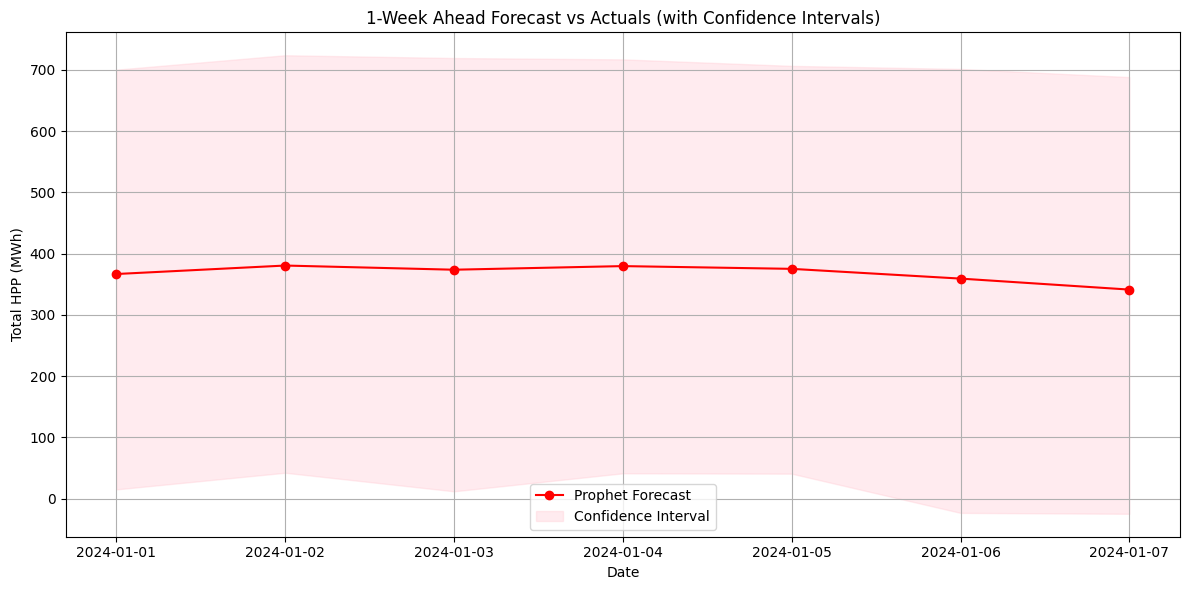

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_7d["ds"], forecast_7d["yhat"], label="Prophet Forecast", color="red", marker="o")
plt.fill_between(forecast_7d["ds"], forecast_7d["yhat_lower"], forecast_7d["yhat_upper"], color="pink", alpha=0.3, label="Confidence Interval")

# Plot actuals if available
if not actuals_7d.empty:
    plt.plot(actuals_7d["ds"], actuals_7d["y"], label="Actuals", color="blue", marker="o")

plt.title("1-Week Ahead Forecast vs Actuals (with Confidence Intervals)")
plt.xlabel("Date")
plt.ylabel("Total HPP (MWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()